In [133]:
import numpy as np
import os
import matplotlib.pyplot as plt

Problem 2-5:
What will be the state distribution after two transitions, i.e., μ2?

In [200]:
              #1   2   3. 4. 5. 6   7    8     9  10   11 12
P = np.array([[0, 0.1, 0, 0, 0, 0, 0.5,  0,   0,  0.4, 0, 0],
              [0, 0,   1, 0, 0, 0, 0,    0,   0,  0,   0, 0],
              [0, 0,   0, 1, 0, 0, 0,    0,   0,  0,   0, 0],
              [0, 0,   0, 0, 1, 0, 0,    0,   0,  0,   0, 0],
              [0, 0.6, 0, 0, 0.4,0,0,    0,   0,  0,   0, 0],
              [0, 0,   0, 0, 1, 0, 0,    0,   0,  0,   0, 0],
              [0, 0,   0, 0, 0, 0, 0.75, 0.25,0,  0,   0, 0],
              [0, 0,   0, 0, 0, 0, 0,    0,   1,  0,   0, 0],
              [0, 0,   0, 0, 0, 0, 0.2,  0.8, 0,  0,   0, 0],
              [0, 0,   0, 0, 0, 0, 0,    0,   0,  0,   1, 0],
              [0, 0,   0, 0, 0, 0, 0,    0,   0,  0.9, 0, 0.1],
              [0, 0,   0, 0, 0, 0, 0,    0,   0,  0,   0, 1]])



m0 = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

def markovianCheck(P):
    """
    Input transition matrix, output "error" string if 
    it is not a valid Markovian matrix.
    """
    for i in range(P.shape[0]):
        temp_sum = np.sum(P[i])
        if temp_sum !=1:
            print('error on row', i)
            
markovianCheck(P) #no error is good.

def computeStateDistribution(P, m0, num_state):
    """
    Compute the state distributino given a transition matrix P and 
    the desired state index given by num_state and initial state distribution
    m0
    """
    for i in range(num_state - 1):
        P = P @ P # multiply P by P by the number of time steps we want to get our state distribution.
        # for example, if we want to know the state distrubtion at t=2 given m0, we need to do m0 @ P @ P. 
    state_dist = m0 @ P
    assert(np.sum(state_dist) == 1)
    return m0 @ P

m2 = computeStateDistribution(P, m0, 2)

for i in range(m2.shape[1]):
    print('probability of being in state', i, 'after 2 state transitions is', m2[0,i])

probability of being in state 0 after 2 state transitions is 0.0
probability of being in state 1 after 2 state transitions is 0.0
probability of being in state 2 after 2 state transitions is 0.1
probability of being in state 3 after 2 state transitions is 0.0
probability of being in state 4 after 2 state transitions is 0.0
probability of being in state 5 after 2 state transitions is 0.0
probability of being in state 6 after 2 state transitions is 0.375
probability of being in state 7 after 2 state transitions is 0.125
probability of being in state 8 after 2 state transitions is 0.0
probability of being in state 9 after 2 state transitions is 0.0
probability of being in state 10 after 2 state transitions is 0.4
probability of being in state 11 after 2 state transitions is 0.0


Problem 5-1a: Compute the analytical solution (matrix inversion) for policy evaluation. Report the value function
at all states.
Note: The discount factor is 0.95.
Agent gets reward of 0 at all states except lightning bolt (-1) and tresaure chest (+1)
On a 4 x 4 grid, the treasure chest is at row 1, col 4 and the lightning bolt is at row 2, col 2 (1-indexing).

Analytical solution for value function is solving for v_pi in v_pi = R_pi + gamma * P_pi * v_pi.
R_pi is the reward function.
P_pi is the transition matrix.
v_pi is the value function. 

Note, after re-arranging, we can solve for v_pi by v_pi = inverse(I - gamma*P_pi) * R_pi

In [282]:
grid = np.zeros((4,4))


grid_actions = np.array([['r', 'r', 'd', 'u'], 
                         ['u', 'u', 'r', 'u'],
                        ['u', 'l', 'r', 'u'], 
                         ['u', 'u', 'r', 'u']])

grid_actions_test = np.array([['l', 'l', 'l', 'l'], 
                         ['l', 'l', 'l', 'l'],
                        ['l', 'l', 'l', 'l'], 
                         ['l', 'l', 'l', 'l']])


def computeTransitionFunction(grid_actions):
    P = np.zeros((16,16))
    for row in range(grid_actions.shape[0]):
        for col in range(grid_actions.shape[1]):
            policy = grid_actions[row,col] #up, down, left, right will be the policy. mapping from state to action
            #check if policy has a boundary or unreachable state:
            current_state = row * 4 + col
            prob_stay = 0.0
            ### POLICY TO THE RIGHT ###
            if policy == 'r':
                temp_col = col + 1
                if (temp_col <= 3) and (temp_col >= 0): #valid
                    next_state = (row, col + 1)
                    next_state = row * 4 + col + 1
                    P[current_state, next_state] = 0.85
                if (temp_col > 3) or (temp_col < 0): # invalid move
                    P[current_state, current_state] = 0.85
                # check if other moves are valid:
                # start with up:
                if (row - 1 >= 0) and (row - 1 <=3):
                    # this transition has a 0.05 probability
                    next_state = (row - 1) * 4 + col
                    if (next_state != 10):
                        P[current_state, next_state] = 0.05
                    else: 
                        P[current_state, current_state] += 0.05
                else:
                    P[current_state, current_state] += 0.05

                # check down:
                if (row + 1 >= 0) and (row + 1 <=3):
                    # this transition has a 0.05 probability
                    next_state = (row + 1) * 4 + col
                    if (next_state != 10):
                        P[current_state, next_state] = 0.05
                    else: 
                        P[current_state, current_state] += 0.05
                else:
                    P[current_state, current_state] += 0.05

                # check left
                if (col - 1 >= 0) and (col - 1 <=3):
                    # this transition has a 0.05 probability
                    next_state = row * 4 + col - 1
                    if (next_state != 10):
                        P[current_state, next_state] = 0.05
                    else: 
                        P[current_state, current_state] += 0.05
                else:
                    P[current_state, current_state] += 0.05



            ### POLICY TO THE LEFT ###
            if policy == 'l':
                temp_col = col - 1
                if (temp_col <= 3) and (temp_col >= 0): #valid
                    next_state = (row, col -1)
                    next_state = row * 4 + col - 1
                    P[current_state, next_state] = 0.85
                if (temp_col > 3) or (temp_col < 0): # invalid move
                    P[current_state, current_state] = 0.85
                #check if other moves are valid:
                # start with up:
                if (row - 1 >= 0) and (row - 1 <=3):
                    # this transition has a 0.05 probability
                    next_state = (row - 1) * 4 + col
                    if (next_state != 10):
                        P[current_state, next_state] = 0.05
                    else: 
                        P[current_state, current_state] += 0.05
                else:
                    P[current_state, current_state] += 0.05

                # check down:
                if (row + 1 >= 0) and (row + 1 <=3):
                    # this transition has a 0.05 probability
                    next_state = (row + 1) * 4 + col
                    if (next_state != 10):
                        P[current_state, next_state] = 0.05
                    else: 
                        P[current_state, current_state] += 0.05
                else:
                    P[current_state, current_state] += 0.05

                # check right:
                if (col +1 >= 0) and (col +1 <=3):
                    # this transition has a 0.05 probability
                    next_state = row * 4 + col + 1
                    if (next_state != 10):
                        P[current_state, next_state] = 0.05
                    else: 
                        P[current_state, current_state] += 0.05
                else:
                    P[current_state, current_state] += 0.05




            if policy == 'u':
                temp_row = row -1
                if (temp_row <= 3) and (temp_row >= 0): #valid
                    next_state = (row - 1) * 4 + col
                    P[current_state, next_state] = 0.85
                if (temp_row > 3) or (temp_row < 0): # invalid move
                    prob_stay = prob_stay + 0.05 #hold this value. We need to know the total invalid moves
                    P[current_state, current_state] = 0.85
                # check if other moves are valid:
                # check down:

                if (row + 1 >= 0) and (row + 1 <=3):
                    # this transition has a 0.05 probability
                    next_state = (row + 1) * 4 + col
                    if (next_state != 10):
                        P[current_state, next_state] = 0.05
                    else: 
                        P[current_state, current_state] += 0.05
                else:
                    P[current_state, current_state] += 0.05
                # check right:

                if (col +1 >= 0) and (col +1 <=3):
                    # this transition has a 0.05 probability
                    next_state = row * 4 + col + 1
                    if (next_state != 10):
                        P[current_state, next_state] = 0.05
                    else: 
                        P[current_state, current_state] += 0.05
                else:
                    P[current_state, current_state] += 0.05
                # check left

                if (col - 1 >= 0) and (col - 1 <=3):
                    # this transition has a 0.05 probability
                    next_state = row * 4 + col - 1
                    if (next_state != 10):
                        P[current_state, next_state] = 0.05
                    else: 
                        P[current_state, current_state] += 0.05
                else:
                    P[current_state, current_state] += 0.05

            if policy == 'd':
                temp_row = row + 1
                if (temp_row <= 3) and (temp_row >= 0): #valid
                    next_state = (row + 1) * 4 + col
                    P[current_state, next_state] = 0.85
                if (temp_row > 3) or (temp_row < 0): # invalid move
                    P[current_state, current_state] = 0.85
                # check if other moves are valid:\
                # check right:

                if (col +1 >= 0) and (col +1 <=3):
                    # this transition has a 0.05 probability
                    next_state = row * 4 + col + 1
                    if (next_state != 10):
                        P[current_state, next_state] = 0.05
                    else:
                        P[current_state,current_state] += 0.05
                else:
                    P[current_state, current_state] += 0.05
                # check left

                if (col - 1 >= 0) and (col - 1 <=3):
                    # this transition has a 0.05 probability
                    next_state = row * 4 + col - 1
                    if (next_state != 10):
                        P[current_state, next_state] = 0.05
                    else:
                        P[current_state,current_state] += 0.05
                else:
                    P[current_state, current_state] += 0.05

                # check up:
                if (row - 1 >= 0) and (row - 1 <=3):
                    # this transition has a 0.05 probability
                    next_state = (row - 1) * 4 + col
                    if (next_state != 10):
                        P[current_state, next_state] = 0.05
                    else:
                        P[current_state,current_state] += 0.05
                else:
                    P[current_state, current_state] += 0.05

    # all actions in the cell with the lightning bolt and treasure chest will keep the agent in the current cell. 
    # this means P[3,3] = 1, P[5,5] = 1
    P[3] = np.array([0, 0, 0 , 1, 0, 0, 0, 0, 0, 0, 0 ,0 ,0 ,0 ,0 ,0])
    P[5] = np.array([0, 0, 0 , 0, 0, 1, 0, 0, 0, 0, 0 ,0 ,0 ,0 ,0 ,0])
    
    return P

P = computeTransitionFunction(grid_actions) # compute the transition function given grid_actions above.

# for i in range(P.shape[0]):
#     print('row', i)
#     print(P[i])
markovianCheck(P) # confirm that P is indeed a row stochaistic matrix.

#Analytical Solution:
gamma = 0.95
R_pi = np.zeros((16, 1))
R_pi[3] = 1 # reward at cell 3
R_pi[5] = -1 # reward at cell 5

v_pi_analytical = np.linalg.inv(np.eye(16) - (gamma * P)) @ R_pi
for i in range(16):
    print('value function at state', i, v_pi_analytical[i])


value function at state 0 [11.23185702]
value function at state 1 [12.06229028]
value function at state 2 [14.74404741]
value function at state 3 [20.]
value function at state 4 [8.93749904]
value function at state 5 [-20.]
value function at state 6 [15.50556825]
value function at state 7 [18.59902354]
value function at state 8 [8.27880624]
value function at state 9 [6.34578879]
value function at state 10 [15.84138082]
value function at state 11 [17.45379858]
value function at state 12 [7.72857881]
value function at state 13 [6.51005875]
value function at state 14 [14.93682128]
value function at state 15 [16.35739377]


Implement and run the iterative solution for approximate policy evaluation with 0 initialization for the value function.

We want the final L-infinity norm || VT - V_pi || <= 0.01 without looking at the results of previous part. 

In [207]:
v0 = np.zeros((16,1))

# Number of iterations is T >= log|| v0 - v_pi|| / log (1 / gamma)
# We know that if reward is bounded, so is any value function for a policy. That bound is (1 / 1 - gamma).
# In this case, we can see that 1 / 1 - 0.95 = 20. Therefore, we need to compute L infinity norm of 
# (0 - 20).

bound = 1 / (1 - gamma)
v_pi = np.ones((16, 1)) * bound

numerator = np.log(np.linalg.norm((v0 - v_pi), ord=np.inf)/ 0.01)
denominator = np.log(1/gamma)
T = int(numerator / denominator)
print("Number of iterations we should use is", T + 1)
#Use same P transition function, gamma, and R, reward function from above.
Vt_plus_1 = R_pi + gamma * P @ v0

for i in range(T + 1):
    if i == 0:
        Vt_plus_1 = R_pi + gamma * P @ v0
        vt = Vt_plus_1
    else:
        Vt_plus_1 = R_pi + gamma * P @ vt
        vt = Vt_plus_1


for i in range(Vt_plus_1.shape[0]):
    print('value function at state', i, 'is', vt[i])

Number of iterations we should use is 149
value function at state 0 is [11.2244465]
value function at state 1 is [12.05482402]
value function at state 2 is [14.73557453]
value function at state 3 is [19.99040937]
value function at state 4 is [8.93103601]
value function at state 5 is [-19.99040937]
value function at state 6 is [15.49710191]
value function at state 7 is [18.58949541]
value function at state 8 is [8.27239676]
value function at state 9 is [6.34025473]
value function at state 10 is [15.83211713]
value function at state 11 is [17.44427117]
value function at state 12 is [7.72220448]
value function at state 13 is [6.50428185]
value function at state 14 is [14.92751377]
value function at state 15 is [16.34787858]


Plot the sequence of errors in the value function from the approximate policy evaluation wrt the iterations. Specifically, plot ||vt - v_pi||inf against t, where Vt is the value function and v_pi is the value function computed from the analytical solution

Text(0, 0.5, 'Error')

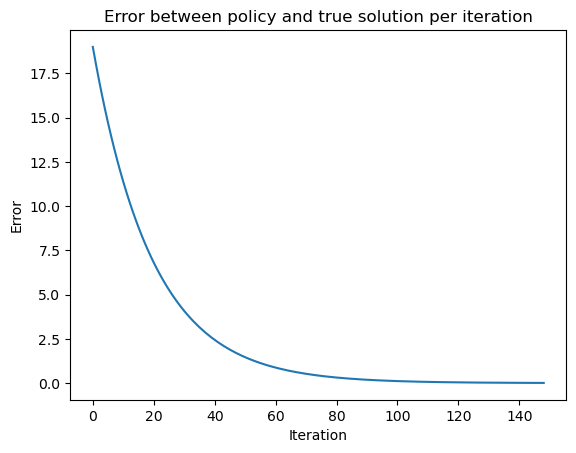

In [208]:
# v_pi is the analytical soution.
error = []
v_pi_analytical = np.linalg.inv(np.eye(16) - (gamma * P)) @ R_pi
for i in range(T + 1):
    if i == 0:
        Vt_plus_1 = R_pi + gamma * P @ v0
        vt = Vt_plus_1
        
        temp_error_L_inf = np.linalg.norm((vt - v_pi_analytical), ord=np.inf)
        error.append(temp_error_L_inf)
    else:
        Vt_plus_1 = R_pi + gamma * P @ vt
        vt = Vt_plus_1
        temp_error_L_inf = np.linalg.norm((vt - v_pi_analytical), ord=np.inf)
        error.append(temp_error_L_inf)
        
plt.plot(error)
plt.title('Error between policy and true solution per iteration')
plt.xlabel('Iteration')
plt.ylabel('Error')

Implement and run a value iteration algorithm to compute an optimal policy in this MDP. Initialize the value function at zero. Pick the number of iterations in a way to ensure 0.01 accuracy in the final computed value function. Demonstrate the learned policy and report the value function at all states

In [244]:
# pseudocode for optimal policy in value iteration:
# initialize all value function outputs to be 0 (i.e, [v(0)... v(15)] = 0)
# for t in range(T+1):
#     for every state:
#        compute value(s) = reward(s) + gamma * max(sum_over_all_s'(p(s'|s, a) * v(s'))).
#NOTE: assume we are starting from cell 12 and action is UP. 
#Then, p(s'|s,a) = p(13) * v(13) + p(8) * v(8) + p(12) * v(12)
#.               = 0.05 * 0 + 0.85 * 0 + 0.1 * 0
# If we start from cell 12 and action is RIGHT:
# Then, p(s'|s, a) = p(13) * v(13) + p(8) * v(8) + p(12) * v(12) again, but, the probabilities are different because
# we have a different action?
# In this case, p(13) = 0.85, p(8) = 0.05, p(12) = 0.1
# We go through each action in each state, and the resulting v(s) = reward(s) + gamma * max(p(s'|s, a) * v(s')).
# For example, if in s(12), we find that action UP gives us the best sum(p(13) * v(13) + p(8) * v(8) + p(12) * v(12)),
# then, we choose that in computing v(12) = reward(s) + gamma * p(s'|s,a ) * v(s')
# Now, how do we get from that to the actual POLICY? 
# After a certain number of iterations, we will have optimal value functions for every state. 
# To get policy for each state, get the value function associated with each possible action. Pick the action that 
# maximizes that value function. 
v_update = np.zeros((16,1))
v_init = np.zeros((16,1))
actions = ['u', 'd', 'r', 'l']
action_dict = {0: 'u', 1: 'd', 2: 'r', 3: 'l'}
selected_actions = np.zeros((16,1)) # store policy

for t in range(0,T+1):
        if t == 0:
            for state, v_s in enumerate(v_init): # iterate through states
                discounted_rewards = np.zeros((4,1)) # placeholder for disounted rewards
                
                for a, action in enumerate(actions):  # iterate through actions
                    #print('action is', action)
                    #need logic to convert row state to row and col. 
                    # if 15, this means 3,3. if 0, this means 0, 0. if 12, this means 
                    
                    grid_actions[state // 4, state % 4] = action # compute the correct transition matrix for this action
                    #print('grid_actions is', grid_actions)
                    transition_matrix = np.zeros((16,16))
                    transition_matrix = computeTransitionFunction(grid_actions)
                    
                    markovianCheck(transition_matrix) # ensure that properties of a markovian matrix hold
                    # after computing the transition function
                    
                    for n, prob in enumerate(transition_matrix[state, :]):
                        if (prob != 0):
                            discounted_rewards[a] += prob * v_init[n] # compute p(s'|s,a) * v(s')
                    
                v_update[state] = R_pi[state] + gamma * np.max(discounted_rewards)
                selected_actions[state] = np.argmax(discounted_rewards) # store policy for this iteration. 
            #print('new v', v_update)
        if t > 0:
            for state, v_s in enumerate(v_update): 
                discounted_rewards = np.zeros((4,1)) # placeholder for disounted rewards
                
                for a, action in enumerate(actions):
                    grid_actions[state // 4, state % 4] = action # compute the correct transition matrix for this action
                    transition_matrix = np.zeros((16,16))
                    transition_matrix = computeTransitionFunction(grid_actions)
                    markovianCheck(transition_matrix)

                    
                    for n, prob in enumerate(transition_matrix[state, :]):
                        if (prob != 0):
                            discounted_rewards[a] += prob * v_update[n]
                            #print('just computed ', prob, 'times', v_update[n])
                v_update[state] = R_pi[state] + gamma * np.max(discounted_rewards)
                selected_actions[state] = np.argmax(discounted_rewards)   
                
                
### Done computing optimal policy - displaying results below ###

selected_actions = selected_actions.reshape(4,4)
action_visualization = np.array([['x','x','x','x'], ['x','x','x','x'], ['x','x','x','x'], ['x','x','x','x']])
print('final learned policy (state 0 is at the top left, state 15 is at bottom right. States increase from right to left, top to bottom):')
print('treasure chest is at top right')
for row in range(selected_actions.shape[0]):
    for col in range(selected_actions.shape[1]):
        action_visualization[row,col] = action_dict[selected_actions[row,col]]
print(action_visualization)
print('final cummulative expected rewards / value function at each state:\n')
for n, i in enumerate(v_update):
    print('value function output at state', n, 'is', i)

final learned policy (state 0 is at the top left, state 15 is at bottom right. States increase from right to left, top to bottom):
treasure chest is at top right
[['r' 'r' 'r' 'u']
 ['u' 'u' 'r' 'u']
 ['d' 'r' 'r' 'u']
 ['r' 'r' 'r' 'u']]
final cummulative expected rewards / value function at each state:

value function output at state 0 is [14.36065177]
value function output at state 1 is [15.40036559]
value function output at state 2 is [18.49741051]
value function output at state 3 is [19.99040937]
value function output at state 4 is [11.81068687]
value function output at state 5 is [-19.99040937]
value function output at state 6 is [15.69393381]
value function output at state 7 is [18.6003618]
value function output at state 8 is [12.69495447]
value function output at state 9 is [13.42441037]
value function output at state 10 is [16.20878528]
value function output at state 11 is [17.4562319]
value function output at state 12 is [13.49059156]
value function output at state 13 is [14.

Implement and run a policy iteration algorithm to compute an optimal policy in this MDP. Initialize the policy randomly by using a uniform distribution over all actions. Pick the number of iterations in a way to ensure 0.01 accuracy in the final computed value function. Demonstrate the learned policy and report the value function at all states.

In [283]:
# pseudocode for optimal policy in policy iteration:
# initialize policy uniformly (i.e, 1/4 chance state will have up, right, down, left)
# for t in range(T+1):
#      evaluate policy for every state (can use v_pi_analytical = np.linalg.inv(np.eye(16) - (gamma * P)) @ R_pi)
#      improve policy - find argmax of immediate reward at that state + gamma * E[v_pi(s')]
#      v_pi(s') is the probability of transitioning to s' * the value at that state. For example, if the
#      probability of going to s' is 0.05, we multiply 0.05 * v_pi(s'). We need to do this for every state
#      and action (I think). 

random_policy = np.random.randint(4, size=(4,4))
for row in range(random_policy.shape[0]):
    for col in range(random_policy.shape[1]):
        grid_actions[row,col] = action_dict[int(random_policy[row,col])]

print('randomly initialized policy:\n',grid_actions)

temp_grid_actions = grid_actions # create a copy - we need one to create the transition matrix but also do not want
# to alter the original policy so we can update the original poicy correctly! 

# Reuse reward function from above. Re-instantiating those variables here for clarity.
R_pi = np.zeros((16, 1))
R_pi[3] = 1 # reward at cell 3
R_pi[5] = -1 # reward at cell 5

value_function_update = np.zeros((16,1)) # init 16 by 1 vector to hold updated  
selected_actions = np.zeros((16,1)) # store policy

for t in range(1,T+1):
    #evaluate policy for each state - use analytical solution:
    P = computeTransitionFunction(grid_actions) # compute the transition function given current policy stored in
    # grid_actions.
    markovianCheck(P) # confirm that P is in fact a valid markovian, row stochaistic matrix 
    # we will see "error" printed below if there is a row that doesn't follow the markovian matrix properties
    #Analytical Solution:
    gamma = 0.95
    v_pi_analytical = np.linalg.inv(np.eye(16) - (gamma * P)) @ R_pi
    #print(v_pi_analytical)
    
    # update policy based on analytical solution.
    for state, v_s in enumerate(v_pi_analytical):
        
        discounted_rewards = np.zeros((4,1)) # placeholder for disounted rewards

        for a, action in enumerate(actions):
            temp_grid_actions[state // 4, state % 4] = action # update the action for the state we are computing 
            # p(s' | s, a) for
            # update transition matrix based on this update to grid_actions
            transition_matrix = computeTransitionFunction(grid_actions)
            markovianCheck(transition_matrix) # confirm we have computed a valid transition function/operator
            
            for n, prob in enumerate(transition_matrix[state, :]):
                if (prob != 0):
                    discounted_rewards[a] += prob * v_pi_analytical[n]
        
        temp_array = np.array([R_pi[state], R_pi[state], R_pi[state], R_pi[state]]) + gamma * discounted_rewards
        selected_actions[state] = np.argmax(temp_array)

        
        #update policy:
        grid_actions[state // 4, state % 4] = action_dict[int(selected_actions[state])]
        
print('final policy:')
print(grid_actions)
print('final value function at each state')
print(v_pi_analytical)
            

            

randomly initialized policy:
 [['d' 'd' 'u' 'u']
 ['u' 'u' 'd' 'l']
 ['u' 'l' 'u' 'u']
 ['d' 'd' 'l' 'u']]
final policy:
[['r' 'r' 'r' 'u']
 ['u' 'u' 'r' 'u']
 ['d' 'r' 'r' 'u']
 ['r' 'r' 'r' 'u']]
final value function at each state
[[ 14.36891147]
 [ 15.40870358]
 [ 18.50683203]
 [ 20.        ]
 [ 11.81761561]
 [-20.        ]
 [ 15.7019808 ]
 [ 18.60936494]
 [ 12.70279695]
 [ 13.43185352]
 [ 16.21717086]
 [ 17.46475832]
 [ 13.49853165]
 [ 14.38116197]
 [ 15.3793975 ]
 [ 16.39040191]]


In [181]:
x1 = np.array([2, 3])
x2 = np.array([4,2])

x1_Linf = np.linalg.norm(x1, ord=np.inf)
print(x1_Linf)

x1_L2 =np.linalg.norm(x1 , ord=2)
x2_L2 = np.linalg.norm(x2, ord=2)
x1x2_L2 = x1_L2 * x2_L2
print(x1x2_L2)

x1_L1 = np.linalg.norm(x1, ord=1)
x2_L1 = np.linalg.norm(x2, ord=1)
print(np.sqrt(x1_L1**2 * x2_L1**2))
print(np.dot(x1, x2))

print(1 % 4)

3.0
16.1245154965971
30.0
14
1
